# Install dependencies if you not have them

In [1]:
# ! pip install tensorflow sklearn

# Generating classifiction data from Sklearn package

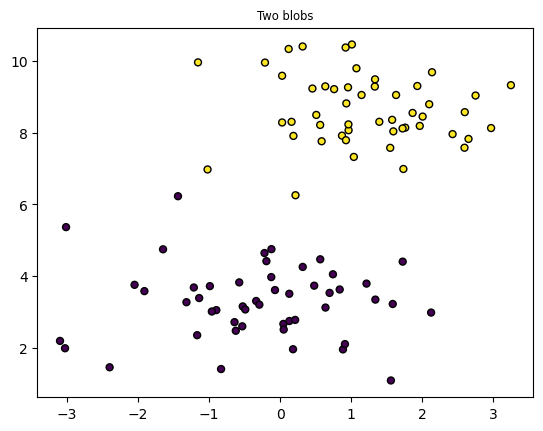

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
plt.title("Two blobs", fontsize="small")
X, y = make_blobs(n_features=2, centers=2)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

### Checking the samples

In [3]:
X,y

(array([[ 0.56407653,  4.47029618],
        [-0.98942907,  3.72201937],
        [ 0.12840079,  3.50855661],
        [ 0.50825182,  8.49760688],
        [ 2.59483676,  7.58324988],
        [ 1.57597871,  8.36169389],
        [ 0.11922392, 10.33815523],
        [ 0.4789807 ,  3.73476612],
        [ 1.21542044,  3.79239871],
        [ 0.8704879 ,  7.92067613],
        [-3.09939899,  2.19386769],
        [ 0.21553097,  6.25808353],
        [ 1.14580863,  9.05408638],
        [ 0.04503804,  2.66777439],
        [ 0.88385759,  1.95665273],
        [ 1.93078795,  9.30527193],
        [ 0.45397925,  9.2344206 ],
        [-1.14044458,  3.38989494],
        [-0.21384312,  9.95892784],
        [ 1.39583458,  8.30654875],
        [ 1.03697921,  7.32657925],
        [ 2.96925335,  8.13218183],
        [ 1.63164937,  9.05396568],
        [ 2.42721239,  7.96311857],
        [-0.64272139,  2.71764876],
        [ 0.9552676 ,  9.2676286 ],
        [ 2.59877301,  8.57574385],
        [-1.02240604,  6.976

# Code to visualize the model Equation

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

ModuleNotFoundError: No module named 'tensorflow'

# Neural Network Model Building, Compiling, fitting 

## Using 1 node neural network
### Loss: Mean Squared Error
### Optimizer: stochastic gradient descent
### Metric: Accuracy

Epoch 1/50
4/4 [==============================] - 0s 1ms/step - loss: 24.7876 - accuracy: 0.3600
Epoch 2/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0435 - accuracy: 1.0000
Epoch 3/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0105 - accuracy: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0165 - accuracy: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 1000us/step - loss: 0.0146 - accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 999us/step - loss: 0.0181 - accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0119 - accuracy: 1.0000
Epoch 8/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0105 - accuracy: 1.0000
Epoch 9/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 10/50
4/4 [==============================] - 0s 1000us/step - loss: 0.0104 - accuracy: 1.0000
Epoch 11/50
4/4 [=============

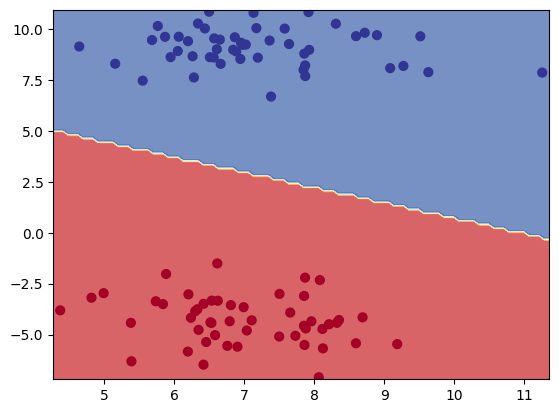

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,tf.keras.activations.linear)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.MSE, # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=50)
plot_decision_boundary(model_1, X, y)

# Predicting a new point (-6,-1) which is almost in the center

In [ ]:
a=model_1.predict([[-6,-1]])
print (a)

1/1 [==============================] - 0s 39ms/step
[[-0.44573838]]


# 44% Probability that the point lies in class Blue